# __Fast Fourier Transform (FFT)__

In [43]:
from scipy.fft import fft, fftfreq,ifft,ifftshift
import matplotlib.pyplot as plt
import numpy as np

In [44]:
f=1000 #Hz
N_sample = 8192
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

In [45]:
sine=[]
time=[]
for i in range(N_sample):
    sine.append(2*(1-np.cos(2*np.pi*f*i*t_gap*10**-6)))
    time.append(i*t_gap*(10**-6))

In [46]:
freq=fftfreq(N_sample,time[1]-time[0])
sine_fft=fft(sine)
print(sine_fft)

[1.63840000e+04-0.00000000e+00j 6.44788416e-12+7.50881462e-12j
 5.28842388e-12-2.38623482e-12j ... 1.43625115e-11-2.09947394e-12j
 5.28842388e-12+2.38623482e-12j 6.44788416e-12-7.50881462e-12j]


d:\Libraries\Python3.12\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Libraries\Python3.12\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


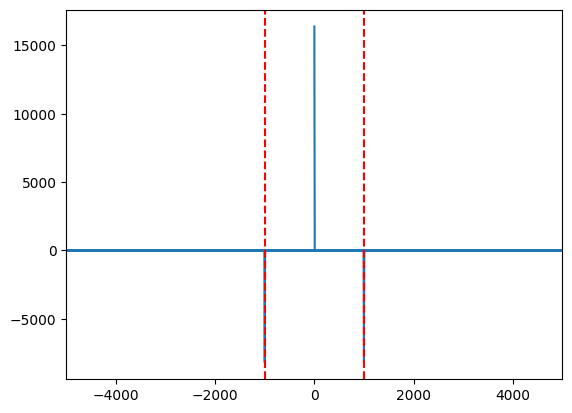

In [47]:
# plt.plot(time,sine)
plt.plot(freq,sine_fft)
plt.xlim(-5000,5000)
# plt.axvline(x=1000, color='r', linestyle='--')
# plt.axvline(x=-1000, color='r', linestyle='--')
plt.show()